In [ ]:
import sys
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/project/"
sys.path.append(path + "URP")
sys.path.append(path + "URP/learning")
sys.path.append(path + "URP/data")
sys.path.append(path + "URP/models")

In [ ]:
%cd /content/drive/My Drive/project/URP/data
!ls

/content/drive/My Drive/project/URP/data
checkpoints   data.py	       data_utils.py  __pycache__
csv_datasets  data_test.ipynb  logs


In [ ]:
'''Test created models here'''

### for pc
'''
sys.path.append("..")
sys.path.append("../data")
sys.path.append("../models")
'''

from data import get_dataset, dummy_clusters, dummy_half_doughnuts
from data_utils import ForgetDataset
from models_utils import *
import models
import torch.nn as nn
from learn import *
from utils import set_seed

In [ ]:
set_seed()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
cnn = {"filters_percentage": 1, "n_channels":3,"num_classes": 50, "dropout": True, "batch_norm": True}
cnn_model = get_model("cnn", **cnn)
print(cnn_model.__class__.__name__)

CNN


In [ ]:
cifar10_train, cifar10_val, cifar10_test = get_dataset("cifar10", batch_size=32, cuda=0,
                  train_size=10000, val_size=1000, test_size=500,
                  test_batch_size=10)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /root/data/cifar-10-python.tar.gz to /root/data
Dataset sizes: 	 train: 10000 	 val: 1000 	 test: 500
Batch size: 	 32


Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 1.5637495517730713, "error": 0.4375}
[0] test metrics:{"loss": 0.8987796306610107, "error": 0.5}
0.8987796306610107
validation loss  0.8987796306610107
Epoch number: 0 
Epoch Time: 13.27 sec
[1] train metrics:{"loss": 1.1687754392623901, "error": 0.4375}
[1] test metrics:{"loss": 1.5070515871047974, "error": 0.5}
1.5070515871047974
validation loss  1.5070515871047974
Epoch number: 1 
Epoch Time: 13.18 sec
[2] train metrics:{"loss": 1.402037262916565, "error": 0.625}
[2] test metrics:{"loss": 1.3658870458602905, "error": 0.375}
1.3658870458602905
validation loss  1.3658870458602905
Epoch number: 2 
Epoch Time: 13.27 sec
[3] train metrics:{"loss": 1.2812395095825195, "error": 0.375}
[3] test metrics:{"loss": 0.9951825737953186, "error": 0.625}
0.9951825737953186
validation loss  0.9951825737953186
Epoch number: 3 
Epoch Time: 13.28 sec
[4] train metrics:{"loss": 1.5567991733551025, 

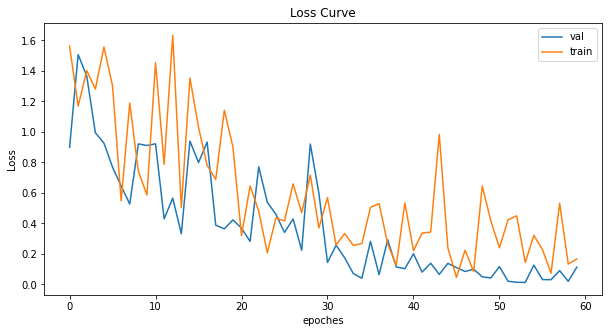

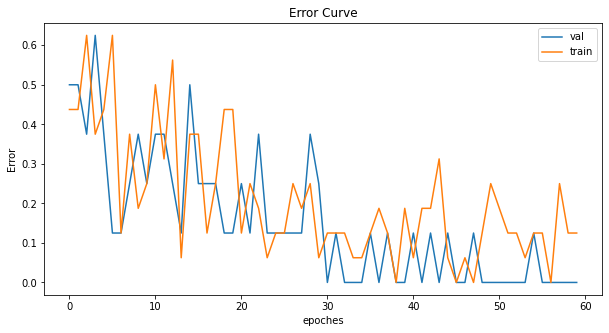

In [ ]:
train(model=cnn_model, loss='ce', optimizer='adam', scheduler=None, epochs=60, device=device, dataset='cifar10', lossfn=None, train_loader=cifar10_train,
      val_loader=cifar10_val, weight_decay=0.0, lr=0.001, momentum=0, patience=10, min_delta=-2)

In [ ]:
test(model=cnn_model, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar10', test_loader=cifar10_test, at_epoch=60)

Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
[0] test metrics:{"loss": 0.20632104575634003, "error": 0.09999996423721313}
FINISHED TESTING


In [ ]:
from google.colab import files
files.download('./checkpoints/CNN_60.pth.tar') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dnn = {"input_size": 1024, "hidden_size":32, "num_classes":10,"num_layer": 6, "activation": nn.ReLU()}
model = get_model("mlp", **dnn)
print(model.__class__.__name__)

MLP


In [ ]:
mnist_train, mnist_val, mnist_test = get_dataset("mnist", batch_size=16, cuda=0,
                  train_size=10000, val_size=1000, test_size=500,
                  test_batch_size=10)

Dataset sizes: 	 train: 10000 	 val: 1000 	 test: 500
Batch size: 	 16


Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 1.9860260486602783, "error": 0.6875}
[0] test metrics:{"loss": 2.585038423538208, "error": 1.0}
Epoch number: 0 
Epoch Time: 3.07 sec
[1] train metrics:{"loss": 1.677909255027771, "error": 0.625}
[1] test metrics:{"loss": 2.2524983882904053, "error": 1.0}
Epoch number: 1 
Epoch Time: 3.06 sec
[2] train metrics:{"loss": 1.3993074893951416, "error": 0.3125}
[2] test metrics:{"loss": 1.7080005407333374, "error": 0.625}
Epoch number: 2 
Epoch Time: 3.04 sec
[3] train metrics:{"loss": 1.5987374782562256, "error": 0.5}
[3] test metrics:{"loss": 1.552452802658081, "error": 0.625}
Epoch number: 3 
Epoch Time: 3.1 sec
[4] train metrics:{"loss": 1.2975490093231201, "error": 0.5}
[4] test metrics:{"loss": 1.4594662189483643, "error": 0.625}
Epoch number: 4 
Epoch Time: 3.04 sec
[5] train metrics:{"loss": 0.8069685101509094, "error": 0.1875}
[5] test metrics:{"loss": 1.1534676551818848, "error

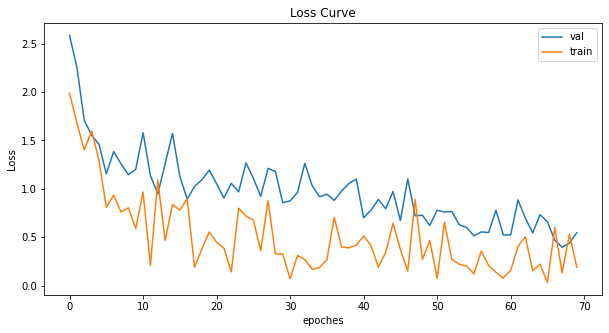

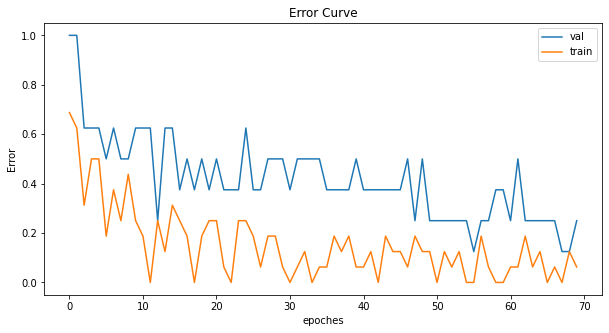

In [ ]:
saved = train(model=model, loss='ce', optimizer='sgd', scheduler=True, epochs=70, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train,
      val_loader=mnist_val, weight_decay=0, lr=0.001, momentum=0.7, patience=5, min_delta=-0.6)

In [ ]:
test(model=saved, loss='ce', optimizer='sgd', device=device, lossfn=None, dataset='mnist', test_loader=mnist_test, at_epoch=None)

Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.1280597597360611
Error:  0.0
FINISHED TESTING


MLP(
  (activation): ReLU()
  (layers): Sequential(
    (0): Layer(in_features=1024, out_features=32, bias=True, beta=0.31622776601683794)
    (1): ReLU()
    (2): Layer(in_features=32, out_features=32, bias=True, beta=0.31622776601683794)
    (3): ReLU()
    (4): Layer(in_features=32, out_features=32, bias=True, beta=0.31622776601683794)
    (5): ReLU()
    (6): Layer(in_features=32, out_features=32, bias=True, beta=0.31622776601683794)
    (7): ReLU()
    (8): Layer(in_features=32, out_features=32, bias=True, beta=0.31622776601683794)
    (9): ReLU()
    (10): Layer(in_features=32, out_features=10, bias=True, beta=0.31622776601683794)
  )
)

In [ ]:
from google.colab import files
files.download('./checkpoints/MLP_70.pth.tar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fashion_train, fashion_val, fashion_test =get_dataset("fashion-mnist", batch_size=16, cuda=0,
                  train_size=10000, val_size=1000, test_size=500,
                  test_batch_size=10)

Dataset sizes: 	 train: 10000 	 val: 1000 	 test: 500
Batch size: 	 16


In [ ]:
cifar100_train, cifar100_val, cifar100_test = get_dataset("cifar100", batch_size=32, cuda=0,
                  train_size=20000, val_size=2000, test_size=1000,
                  test_batch_size=10)

Files already downloaded and verified
Dataset sizes: 	 train: 20000 	 val: 2000 	 test: 1000
Batch size: 	 32


In [ ]:
resnet18 = {"filters_percentage": 0.4, "n_channels":3,"num_classes": 100, "block": ResBlock, "num_blocks": [2,2,2,2]}
model = get_model("resnet18", **resnet18)
print(model.__class__.__name__)

ResNet18


Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 4.512668609619141, "error": 0.96875}
[0] test metrics:{"loss": 4.066493034362793, "error": 0.9375}
Epoch number: 0 
Epoch Time: 12.98 sec
[1] train metrics:{"loss": 4.060430526733398, "error": 0.90625}
[1] test metrics:{"loss": 3.912081241607666, "error": 0.9375}
Epoch number: 1 
Epoch Time: 12.96 sec
[2] train metrics:{"loss": 3.7611865997314453, "error": 0.875}
[2] test metrics:{"loss": 3.753871440887451, "error": 0.875}
Epoch number: 2 
Epoch Time: 12.93 sec
[3] train metrics:{"loss": 3.734158754348755, "error": 0.90625}
[3] test metrics:{"loss": 3.460813045501709, "error": 0.8125}
Epoch number: 3 
Epoch Time: 13.06 sec
[4] train metrics:{"loss": 3.701526165008545, "error": 0.9375}
[4] test metrics:{"loss": 3.588839054107666, "error": 0.8125}
Epoch number: 4 
Epoch Time: 13.12 sec
[5] train metrics:{"loss": 3.6665847301483154, "error": 0.9375}
[5] test metrics:{"loss": 3.29

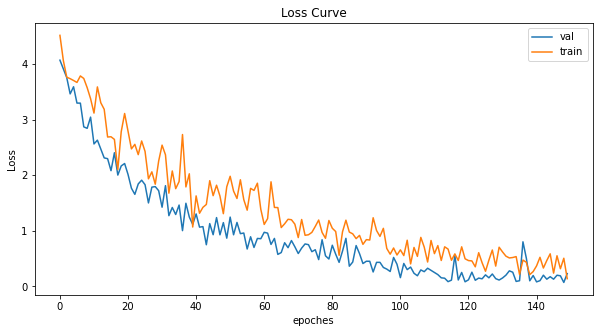

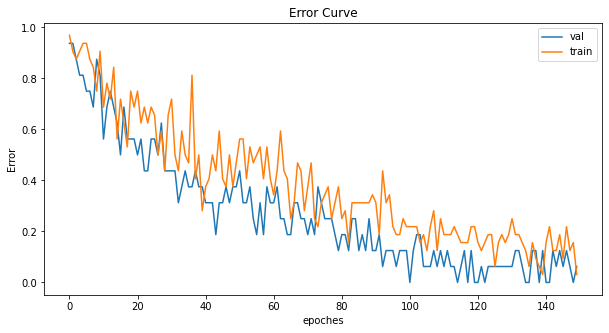

ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): ResBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(25, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (shortcut): Sequential(
        (0): Conv2d(64, 25, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
    )
    (1): ResBlock(
      (bn1): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(25, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_r

In [ ]:
train(model=model, loss='ce', optimizer='sgd', scheduler=None, epochs=150, device=device, dataset='cifar100', lossfn=None, train_loader=cifar100_train,
      val_loader=cifar100_val, weight_decay=0, lr=0.001, momentum=0.7, patience=5, min_delta=-0.6)

In [ ]:
test(model=model, loss='ce', optimizer='sgd', device=device, lossfn=None, dataset='cifar100', test_loader=cifar100_test, at_epoch=200)

Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
TESTING
[200] test metrics:{"loss": 3.2400870323181152, "error": 0.5}
FINISHED TESTING


ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): ResBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(25, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (shortcut): Sequential(
        (0): Conv2d(64, 25, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
    )
    (1): ResBlock(
      (bn1): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(25, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_r

In [ ]:
! ls ./checkpoints/
from google.colab import files
files.download('./checkpoints/ResNet18_200.pth.tar')

ResNet18_200.pth.tar  ResNet18_70.pth.tar


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
traind, val, test = get_dataset("csv", path='/content/drive/My Drive/project/URP/data/csv_datasets/winequality-red.csv')

In [ ]:
regression = LinearRegression(input_size=11, output_size=1)

Optimizer: 	  sgd

Loss function:
L1Loss()
[Logging in LinearRegression_training]
[0] train metrics:{"loss": 3.8465569019317627, "error": 0.9333333298563957}
[0] test metrics:{"loss": 0.5502638816833496, "error": 0.9375}
Epoch number: 0 
Epoch Time: 0.16 sec
[1] train metrics:{"loss": 2.9017035961151123, "error": 1.0}
[1] test metrics:{"loss": 0.7654707431793213, "error": 0.9375}
Epoch number: 1 
Epoch Time: 0.15 sec
[2] train metrics:{"loss": 1.8402812480926514, "error": 1.0}
[2] test metrics:{"loss": 2.1352221965789795, "error": 0.9375}
INFO: Early stopping counter 1 of 7
Epoch number: 2 
Epoch Time: 0.14 sec
[3] train metrics:{"loss": 2.0237722396850586, "error": 0.9333333298563957}
[3] test metrics:{"loss": 0.8972296714782715, "error": 0.9375}
Epoch number: 3 
Epoch Time: 0.15 sec
[4] train metrics:{"loss": 0.5534493923187256, "error": 0.9333333298563957}
[4] test metrics:{"loss": 1.0824615955352783, "error": 0.9375}
Epoch number: 4 
Epoch Time: 0.14 sec
[5] train metrics:{"loss": 

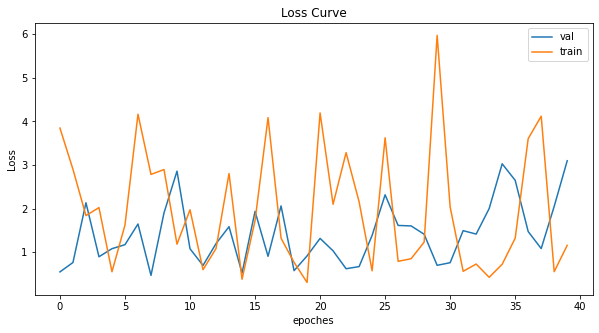

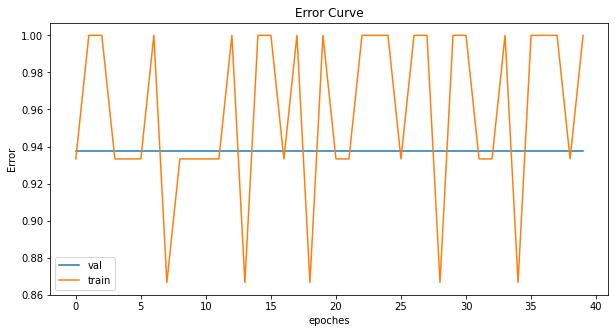

In [ ]:
train(model=regression, loss='mae', optimizer='sgd', scheduler=None, epochs=500, device=device, dataset='mnist', lossfn=None, train_loader=traind, val_loader=test, weight_decay=0.0, lr=0.001, momentum=0.9, min_delta=-1)

In [ ]:
from google.colab import files
!ls ./checkpoints/
files.download('./checkpoints/LinearRegression_100.pth.tar')

LinearRegression_100.pth.tar  LinearRegression_40.pth.tar
LinearRegression_10.pth.tar   LinearRegression_48.pth.tar
LinearRegression_12.pth.tar   LinearRegression_9.pth.tar


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
traind, val, testd = get_dataset("csv", path='/content/drive/My Drive/project/URP/data/csv_datasets/winequality-red.csv')
dnn = {"input_size": 11, "hidden_size":16, "num_classes":1,"num_layer": 8, "activation": nn.ReLU()}
dnn_model = get_model("mlp", **dnn)
print(dnn_model.__class__.__name__)

MLP


Optimizer: 	  sgd

Loss function:
MSELoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 1.4074443578720093, "error": 0.9333333298563957}
[0] test metrics:{"loss": 0.37178733250817686, "error": 1.0}
Epoch number: 0 
Epoch Time: 0.22 sec
[1] train metrics:{"loss": 0.5687349438667297, "error": 0.9333333298563957}
[1] test metrics:{"loss": 0.37402879896040986, "error": 1.0}
Epoch number: 1 
Epoch Time: 0.24 sec
[2] train metrics:{"loss": 0.49236103892326355, "error": 1.0}
[2] test metrics:{"loss": 0.3738822383152751, "error": 1.0}
Epoch number: 2 
Epoch Time: 0.23 sec
[3] train metrics:{"loss": 0.702616810798645, "error": 0.9333333298563957}
[3] test metrics:{"loss": 0.3947933907920742, "error": 1.0}
Epoch number: 3 
Epoch Time: 0.23 sec
[4] train metrics:{"loss": 1.232332706451416, "error": 0.9333333298563957}
[4] test metrics:{"loss": 0.3795299174954039, "error": 1.0}
Epoch number: 4 
Epoch Time: 0.22 sec
[5] train metrics:{"loss": 0.6784094572067261, "error": 0.8666666597127914

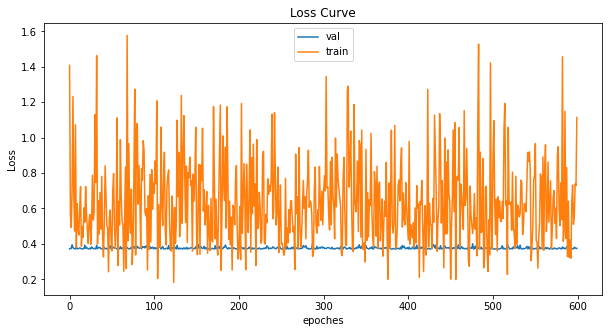

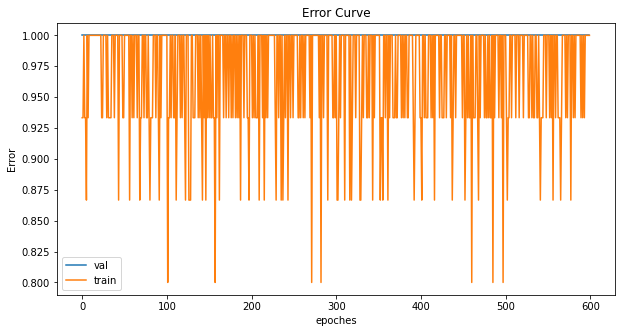

In [ ]:
train(model=dnn_model, loss='mse', optimizer='sgd', scheduler=None, epochs=600, device=device, dataset='csv', lossfn=None, train_loader=traind, val_loader=testd, weight_decay=0.0, lr=0.001, momentum=0, min_delta=-1, name="csv")